In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from isaac.visualization import plot_lineplot_with_paper_style, smooth_out_rl_stats

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
model_directory = "models/answer_questions_two_networks/"
data_directory = "answer_questions_two_networks_plots/"

In [3]:
stats = pd.read_hdf(data_directory+"training_data.h5", "training_data")

In [4]:
stats["Episode"] = stats.index

In [5]:
stats.head()

,control,correct_answer,episode_length,question_loss,value_loss,seed,Episode
0,0,False,633,0,"tensor(0.0703, device='cuda:0')",0,0
1,1,False,607,0,"tensor(0.0699, device='cuda:0')",0,1
2,0,False,601,0,"tensor(0.0636, device='cuda:0')",0,2
3,0,True,631,0,"tensor(0.0586, device='cuda:0')",0,3
4,0,False,611,0,"tensor(0.0549, device='cuda:0')",0,4


In [6]:
stats["none"] = (stats.control == 0)
stats["one_ball"] = (stats.control == 1)
stats["two_balls"] = (stats.control == 2)

In [7]:
np.corrcoef(stats.control, stats.correct_answer)

array([[1.        , 0.00683947],
       [0.00683947, 1.        ]])

In [8]:
WINDOW_SIZE = 100

In [9]:
columns = ["none", "one_ball", "two_balls", "episode_length", "value_loss", "question_loss", "correct_answer"]
rolling_stats = smooth_out_rl_stats(stats, columns)

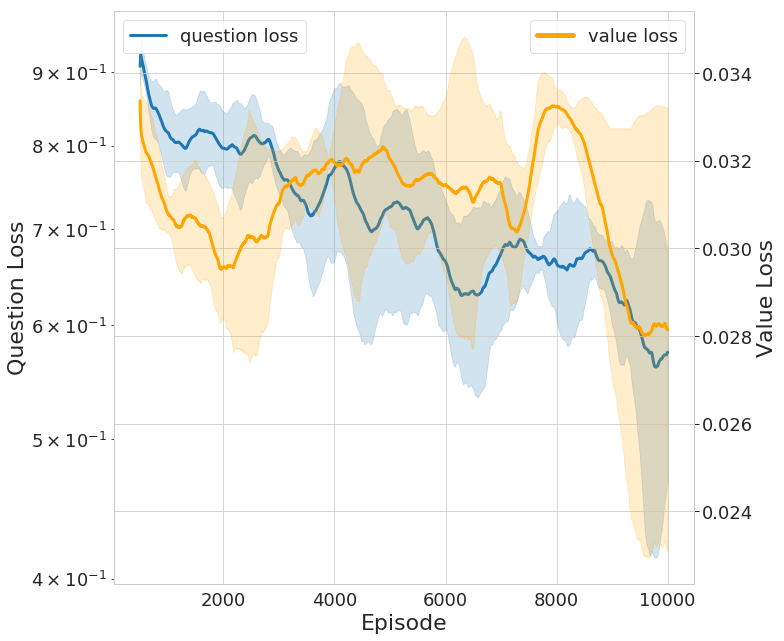

In [13]:
plt.figure(figsize=(11, 9))
ax = plot_lineplot_with_paper_style(None, x="Episode", y="question_loss", markers=True, data=rolling_stats, linewidth=3, ci="sd", label="question loss")
plt.legend(loc=2)
plt.ylabel("Question Loss")
ax.set_yscale("log")
ax2 = ax.twinx()
plot_lineplot_with_paper_style(None, x="Episode", y="value_loss", markers=True, data=rolling_stats, linewidth=3, ci="sd", ax=ax2, c="orange", label="value loss")
plt.ylabel("Value Loss")
plt.savefig(data_directory+"losses.pdf")

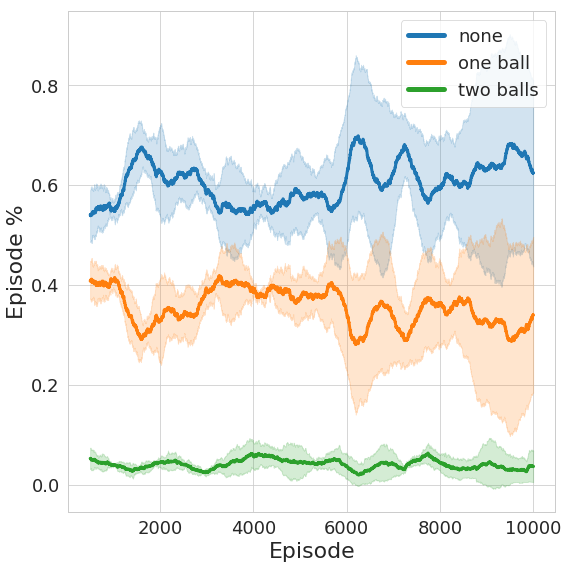

In [14]:
rolling_stats["Episode"] = rolling_stats.index
ax = plot_lineplot_with_paper_style(None, x="Episode", y="none", markers=True, data=rolling_stats, linewidth=3, ci="sd", label="none")
ax = plot_lineplot_with_paper_style(None, ax=ax, x="Episode", y="one_ball", markers=True, data=rolling_stats, linewidth=3, ci="sd", label="one ball")
ax = plot_lineplot_with_paper_style(None, ax=ax, x="Episode", y="two_balls", markers=True, data=rolling_stats, linewidth=3, ci="sd", label="two balls")

plt.ylabel("Episode %")
plt.savefig(data_directory+"control.pdf")

No handles with labels found to put in legend.


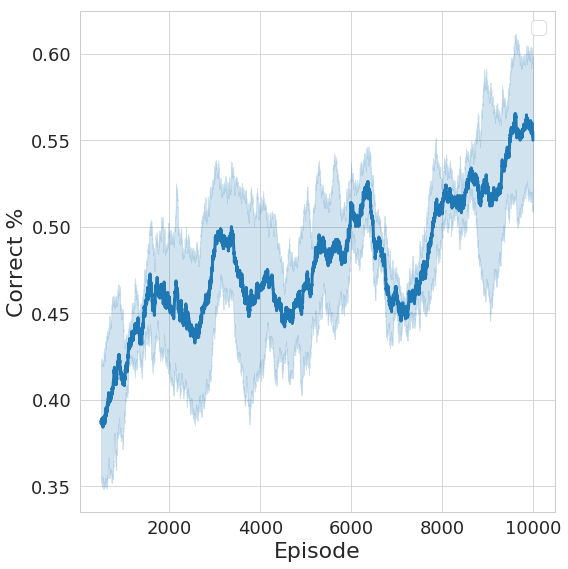

In [15]:
ax = plot_lineplot_with_paper_style(None, x="Episode", y="correct_answer", markers=True, data=rolling_stats, linewidth=3, ci="sd")
plt.ylabel("Correct %")
plt.savefig(data_directory+"correct.pdf")

No handles with labels found to put in legend.


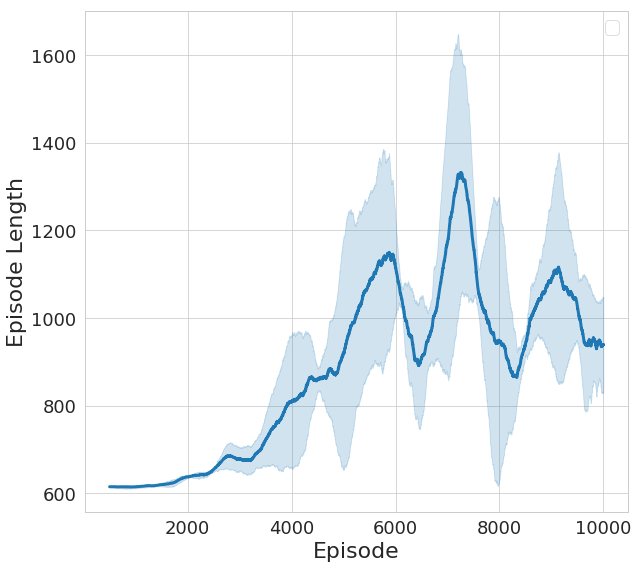

In [16]:
plt.figure(figsize=(9, 8))
ax = plot_lineplot_with_paper_style(None, x="Episode", y="episode_length", markers=True, data=rolling_stats, linewidth=3, ci="sd")
plt.ylabel("Episode Length")
plt.savefig(data_directory+"episode_length.pdf")

# Validation data

In [17]:
stats = pd.read_hdf(data_directory+"validation_data.h5", "validation_data")

In [18]:
stats.head()

,avg_answers,avg_control,avg_episode_length,std_answers,std_control,std_episode_length,seed,episode
0,0.0,0.5,1799.0,0.0,0.5,0.0,0,9000
0,0.0,0.0,759.0,0.0,0.0,158.0,0,6000
0,1.0,0.0,1089.0,0.0,0.0,80.0,0,4000
0,0.5,0.0,1799.0,0.5,0.0,0.0,0,7000
0,0.0,0.0,601.0,0.0,0.0,0.0,0,0


In [19]:
stats.episode = stats.episode.astype(int)
stats.seed = stats.seed.astype(int)

No handles with labels found to put in legend.


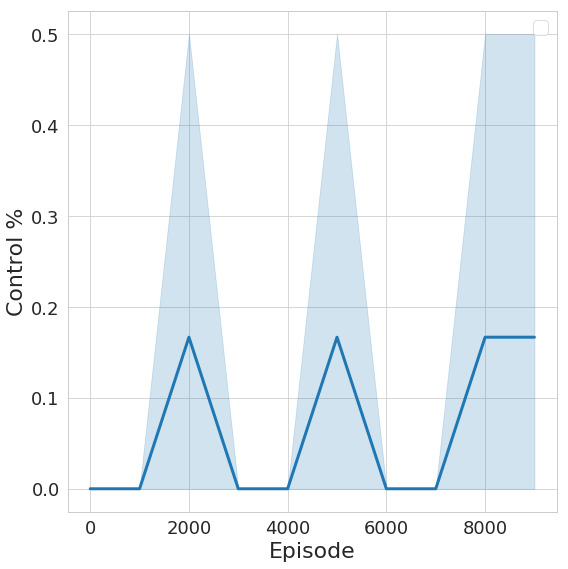

In [23]:
plt.xticks(ticks=np.arange(0, stats.episode.max(), 5000), labels=np.arange(0, stats.episode.max(), 5000))
ax = plot_lineplot_with_paper_style(None, x="episode", y="avg_control", data=stats, linewidth=3)
plt.ylabel("Control %")
plt.xlabel("Episode")
plt.savefig(data_directory+"validation_control.pdf")

In [24]:
stats.sort_values(by="avg_control", ascending=False).iloc[0]

avg_answers              0.0
avg_control              0.5
avg_episode_length    1799.0
std_answers              0.0
std_control              0.5
std_episode_length       0.0
seed                     0.0
episode               9000.0
Name: 0, dtype: float64

No handles with labels found to put in legend.


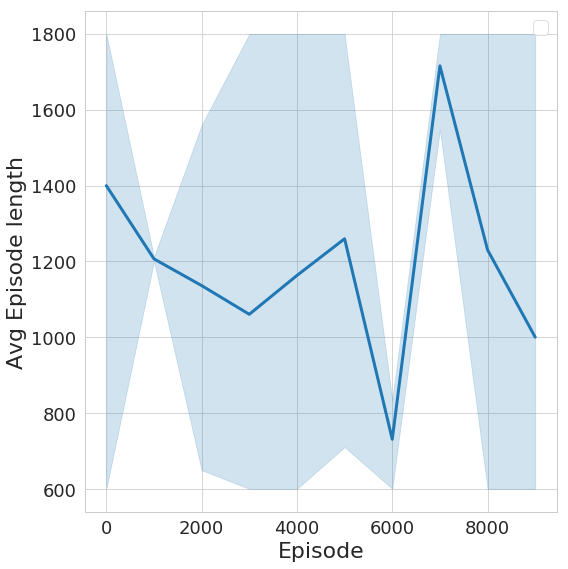

In [25]:
plt.xticks(ticks=np.arange(0, stats.episode.max(), 2500), labels=np.arange(0, stats.episode.max(), 2500))
ax = plot_lineplot_with_paper_style(None, x="episode", y="avg_episode_length", data=stats, linewidth=3)
plt.ylabel("Avg Episode length")
plt.xlabel("Episode")
plt.savefig(data_directory+"validation_ep_length.pdf")